<a href="https://colab.research.google.com/github/sudhanshumukherjeexx/PyTorch-Playground/blob/main/2_Building_Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Neural Network from Scratch Using PyTorch

#### 1. **Loading the Dataset (Input and Output)**

- Importing the necessary libraries (PyTorch, torchvision).
- Downloading and preparing the MNIST dataset (input: images, output: labels).
- Visualizing some samples from the dataset.

#### 2. **Architecture of the Model**

- Defining the structure of the neural network (input layer, hidden layers, output layer).
- Discussing activation functions (ReLU for hidden layers, softmax for the output layer).

#### 3. **Initializing the Weights for All Layers**

- Defining how weights are initialized.
- Using PyTorch’s `nn.Module` class to manage layers and initialization.

#### 4. **Implementing Forward Propagation**

- Defining the forward pass function, which computes the output of the network given an input.
- Computing the loss using cross-entropy loss.

#### 5. **Implementing Backward Propagation**

- Using PyTorch’s automatic differentiation to compute gradients.
- Backpropagating errors to update weights.

#### 6. **Training the Model for `n` Epochs**

- Training the model using the dataset.
- Updating weights using an optimizer (e.g., SGD or Adam).
- Printing the loss after every epoch to track the learning progress.
- Evaluating the model on the test set.

#### 7. **Evaluating the Model**

- Calculating accuracy on the test dataset.
- Visualizing some test results (e.g., predicted vs. actual labels).

### 1. Loading the MNIST Dataset

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [4]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 38708531.60it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1163725.65it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 9683206.59it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 2985976.30it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [38]:
train_size = len(trainset)
test_size = len(testset)

print(f'Size of training data: {train_size}')
print(f'Size of test data: {test_size}')

Size of training data: 60000
Size of test data: 10000


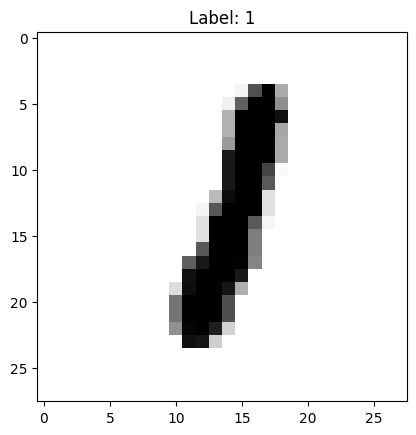

In [15]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
plt.title(f'Label: {labels[0]}')
plt.show()

### 2. Defining the Neural Network Architecture

In [16]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(28*28, 128) # 1st HL input: 28x28 pixels and output:128 neurons
    self.fc2 = nn.Linear(128, 64)    # 2nd HL input: 128 neurons and output: 64 neurons
    self.fc3 = nn.Linear(64, 10)     # Output Layer input: 64 neurons and output: 10 classes

  def forward(self, x):
    x = x.view(-1, 28*28)            # flatten images 28x28 to 1D vector
    x = torch.relu(self.fc1(x))      # ReLU
    x = torch.relu(self.fc2(x))      # ReLU
    x = self.fc3(x)                  # raw scores
    return x

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


### 3. Intializing Weights

- PyTorch initializes weights automatically using methods like Kaiming or Xavier initialization depending on the layer type.
- Can also intialized manually

In [17]:
def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.xavier_uniform_(m.weight)

model.apply(init_weights)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

### 4. Implementing Forward Propogation

In [22]:
criterion =  nn.CrossEntropyLoss()  # loss fucntion

# forward pass with random batch of images
images, labels = next(iter(trainloader))
outputs = model(images)
loss = criterion(outputs, labels)
print(f'Intial Loss: {loss.item()}')

Intial Loss: 2.3255362510681152


### Backward Propogation
- Handled using `backward()`

In [23]:
# Zero the parameter gradients
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Forward pass
outputs = model(images)
loss = criterion(outputs, labels)

# Backward pass
loss.backward()

# update weights
optimizer.step()

print(f'Updated Loss: {loss.item()}')

Updated Loss: 2.3255362510681152


### Model Training for `n` EPOCHS

In [24]:
epochs = 10
for epoch in range(epochs):
  running_loss = 0.0
  for images, labels in trainloader:
    optimizer.zero_grad()

    outputs = model(images)
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}')

print('Finished Training')

Epoch [1/10], Loss: 0.4489
Epoch [2/10], Loss: 0.2510
Epoch [3/10], Loss: 0.2007
Epoch [4/10], Loss: 0.1681
Epoch [5/10], Loss: 0.1447
Epoch [6/10], Loss: 0.1272
Epoch [7/10], Loss: 0.1139
Epoch [8/10], Loss: 0.1035
Epoch [9/10], Loss: 0.0942
Epoch [10/10], Loss: 0.0861
Finished Training


### 7. Evaluating the Model

In [25]:
correct = 0
total = 0
with torch.no_grad():
  for images, labels in testloader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct/total
print(f'Accuracy of the Network on test images: {accuracy:.2f}%')

Accuracy of the Network on test images: 96.84%


### 8. Visualizing Test Results

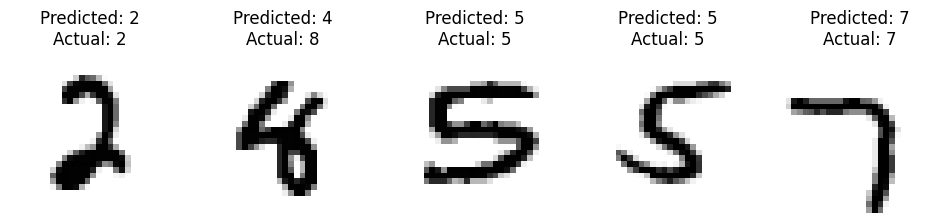

In [33]:
dataiter = iter(testloader)
images, labels = next(dataiter)

outputs = model(images)
_, predicted = torch.max(outputs, 1)

fig,axes = plt.subplots(1,5, figsize=(12,4))
for i in range(5):
  ax = axes[i]
  ax.imshow(images[i].numpy().squeeze(), cmap='gray_r')
  ax.set_title(f'Predicted: {predicted[i]}\nActual: {labels[i]}')
  ax.axis('off')
plt.show()